In [1]:
import pandas as pd
tsv_file_path = 'filtered.tsv'

data = pd.read_csv(
    tsv_file_path, sep="\t", index_col=0
)

data.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577777 entries, 0 to 577776
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reference    577777 non-null  object 
 1   translation  577777 non-null  object 
 2   similarity   577777 non-null  float64
 3   lenght_diff  577777 non-null  float64
 4   ref_tox      577777 non-null  float64
 5   trn_tox      577777 non-null  float64
dtypes: float64(4), object(2)
memory usage: 30.9+ MB


In [ ]:
(data.ref_tox < data.trn_tox).mean()

In [ ]:
mask = data["trn_tox"] > data["ref_tox"]
temp = data.loc[mask, "reference"].copy()
data.loc[mask, "reference"] = data.loc[mask, "translation"]
data.loc[mask, "translation"] = temp

In [3]:
toxicity_threshold = 0.99
filtered_data = data[
    ((data["ref_tox"] > toxicity_threshold) & (data["trn_tox"] < 1 - toxicity_threshold))
    | ((data["trn_tox"] > toxicity_threshold) & (data["ref_tox"] < 1 - toxicity_threshold))
]

filtered_data.shape

(577777, 6)

In [ ]:
(filtered_data.ref_tox < filtered_data.trn_tox).mean()

In [ ]:
data = filtered_data

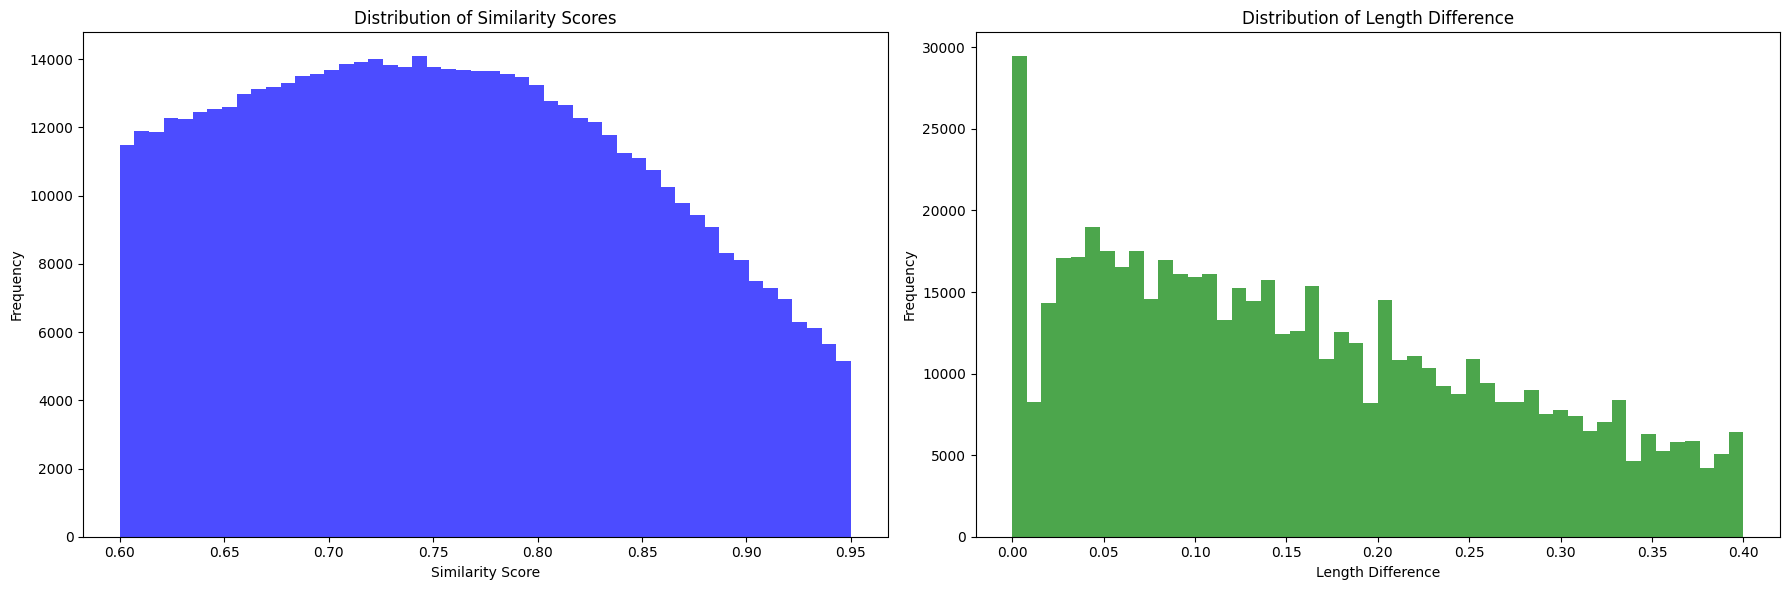

{'Average Length of Reference': 53.88074118561313,
 'Average Length of Translation': 49.818068216630294,
 'Average Similarity': 0.7584692006374207,
 'Average Length Difference': 0.15765231074368755}

In [4]:
import matplotlib.pyplot as plt

# Basic EDA: Distributions and averages
eda_data = {
    "Average Length of Reference": data['reference'].apply(len).mean(),
    "Average Length of Translation": data['translation'].apply(len).mean(),
    "Average Similarity": data['similarity'].mean(),
    "Average Length Difference": data['lenght_diff'].mean()
}

# Plotting the distributions of similarity and length difference
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Similarity score distribution
ax[0].hist(data['similarity'], bins=50, color='blue', alpha=0.7)
ax[0].set_title('Distribution of Similarity Scores')
ax[0].set_xlabel('Similarity Score')
ax[0].set_ylabel('Frequency')

# Length difference distribution
ax[1].hist(data['lenght_diff'], bins=50, color='green', alpha=0.7)
ax[1].set_title('Distribution of Length Difference')
ax[1].set_xlabel('Length Difference')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

eda_data


In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
import re

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

# Initialize lemmatizer, stemmer and stopwords list
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    # Lemmatize and stem each word
    words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in words]
    return ' '.join(words)

# Preprocess entries for 'reference' and 'translation' columns
data_preprocessed = data.copy()
data_preprocessed['reference'] = data_preprocessed['reference'].apply(preprocess_text)
data_preprocessed['translation'] = data_preprocessed['translation'].apply(preprocess_text)

data_preprocessed[['reference', 'translation']]


[nltk_data] Downloading package punkt to /home/cosmos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/cosmos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/cosmos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/cosmos/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,reference,translation
0,alkar flood psychic wast explain high level ne...,alkar flood mental wast would explain high lev...
1,your get nasti,your becom disgust
2,well could spare life one,well spare life
3,ah monkey youv got snap,monkey wake
4,ive got order put,order kill
...,...,...
577772,didnt know estel stolen fish bin,didnt know estel stole fish garbag
577773,itil suck life,youd suck life
577774,cant fuckin take bruv,realli cant take
577775,call fuck hero truth didnt care anymor,said hero didnt care


In [18]:
data_preprocessed[['reference', 'translation']].shape

(5, 2)

In [20]:
bad_text = " ".join(data_preprocessed["reference"].values)
good_text = " ".join(data_preprocessed["translation"].values)

In [21]:
bad_text[:100]

'alkar flood psychic wast explain high level neurotransmitt your get nasti well could spare life one '

In [13]:
from wordcloud import WordCloud

bad_wordcloud = WordCloud(
    max_font_size=40, background_color="white", margin=0, width=300, height=300
).generate(bad_text)
good_wordcloud = WordCloud(
    max_font_size=40, background_color="white", margin=0, width=300, height=300
).generate(good_text)

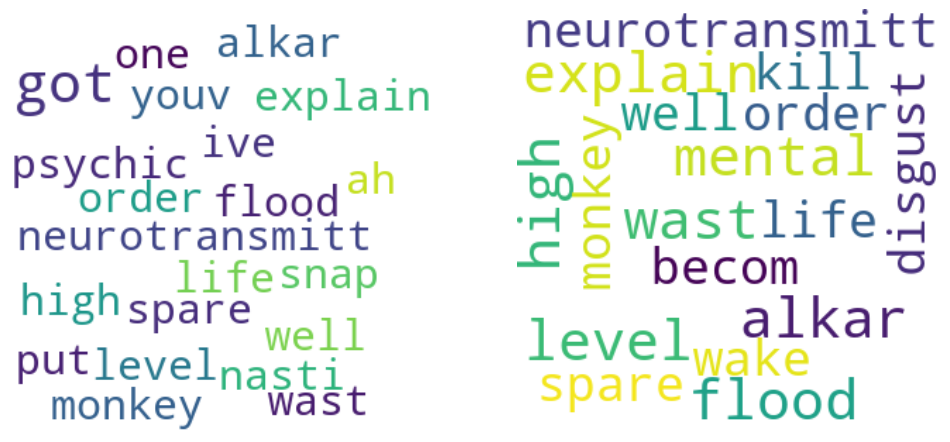

In [14]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(bad_wordcloud, interpolation="bilinear")
ax1.axis("off")
ax2.imshow(good_wordcloud, interpolation="bilinear")
ax2.axis("off")
plt.show()

0.4688642850096144

(173907, 6)

0.3458687689397206

In [ ]:
from sklearn.model_selection import train_test_split

# Function to clean the text data
def clean_text(text):
    """
    Perform any necessary cleaning of the text, such as removing unwanted characters
    or artifacts that are a result of the dataset creation process.
    """
    # Here we can add any text preprocessing needed
    # For now, we'll just strip whitespace for simplicity
    cleaned_text = text.strip()
    return cleaned_text

# Clean the reference and translation columns
data['reference_cleaned'] = data['reference'].astype(str).apply(clean_text)
data['translation_cleaned'] = data['translation'].astype(str).apply(clean_text)

# Split the dataset into training and validation sets
train_df, val_df = train_test_split(data, test_size=0.1, random_state=42)

# Select only the necessary columns for training and validation
train_df = train_df[['reference_cleaned', 'translation_cleaned']]
val_df = val_df[['reference_cleaned', 'translation_cleaned']]

# Checking the first few rows of the training data
train_df.head()


,reference_cleaned,translation_cleaned
515684,He make everyone crazy.,it drives everyone crazy.
485894,Unmindful of the nurse—they had seen his bare ...,"Johnny didn't look back on his sister, God kno..."
381381,It's Abby and the freak.,that's Abby and that dick.
149104,"Besides, they might shoot somebody.","besides, they might have shot someone."
203533,"Amber, when I was your age, I made some really...","Amber, when I was your age, I did some things ..."


In [ ]:
train_df.shape

(519999, 2)

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader

# Load the T5 tokenizer and T5 model
tokenizer = T5Tokenizer.from_pretrained('t5-small')  # You might use "t5-base" or "t5-large"
model = T5ForConditionalGeneration.from_pretrained('t5-small')

# Create a custom dataset class
class TextDetoxDataset(Dataset):
    def __init__(self, tokenizer, data_df, max_length=512):
        self.tokenizer = tokenizer
        self.input_texts = data_df['reference_cleaned']
        self.target_texts = data_df['translation_cleaned']
        self.max_length = max_length
    
    def __len__(self):
        return len(self.input_texts)
    
    def __getitem__(self, index):
        # Tokenize the input and target text
        input_text = self.input_texts.iloc[index]
        target_text = self.target_texts.iloc[index]
        
        source = tokenizer.encode_plus(
            input_text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        target = tokenizer.encode_plus(
            target_text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': source['input_ids'].flatten(),
            'attention_mask': source['attention_mask'].flatten(),
            'labels': target['input_ids'].flatten()
        }

# Create the training and validation datasets
train_dataset = TextDetoxDataset(tokenizer, train_df)
val_dataset = TextDetoxDataset(tokenizer, val_df)

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',          # Output directory
    num_train_epochs=3,              # Total number of training epochs
    per_device_train_batch_size=8,   # Batch size per device during training
    per_device_eval_batch_size=8,    # Batch size for evaluation
    warmup_steps=500,                # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # Strength of weight decay
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=10,
    evaluation_strategy='steps',     # Evaluation is done at the end of each epoch
    save_steps=1000,
    eval_steps=500,
    load_best_model_at_end=True      # Load the best model at the end of training
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

# Save the model
model.save_pretrained('./my_t5_text_detox_model')
tokenizer.save_pretrained('./my_t5_text_detox_model')


2023-11-05 00:21:17.312263: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-05 00:21:18.257160: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-t

  0%|          | 0/195000 [00:00<?, ?it/s]